#### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
# !pip install pycaret
from pycaret.classification import *

#### Importing the data

In [2]:
data=pd.read_csv("data/epoch3.csv")
data.head()

,origIntRate,origUPB,origDate,origLTV,origDebtIncRatio,zipCode,worstCreditScore,bankNumber,stateNumber,currIntRate,...,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,4.375,310000,11/1/2013,64,50,220,751,54,47,4.375,...,4.16,4.255,0.045673,2.65,0.025,-0.215,0.120,0.005747,-0.051683,0.028202
1,4.625,142000,11/1/2013,69,45,841,640,54,46,4.625,...,4.16,4.255,0.045673,2.65,0.275,-0.465,0.370,0.063218,-0.111779,0.086957
2,5.000,124000,11/1/2013,80,35,291,695,54,42,5.000,...,4.16,4.255,0.045673,2.65,0.650,-0.840,0.745,0.149425,-0.201923,0.175088
3,4.490,170000,11/1/2013,54,39,117,649,26,35,4.490,...,4.16,4.255,0.045673,2.65,0.140,-0.330,0.235,0.032184,-0.079327,0.055229
4,4.750,100000,11/1/2013,32,30,919,773,71,4,4.750,...,4.16,4.255,0.045673,2.65,0.400,-0.590,0.495,0.091954,-0.141827,0.116334


In [3]:
data.shape

(35388, 30)

In [4]:
#Checking for missing values
data.isnull().sum()

origIntRate           0
origUPB               0
origDate              0
origLTV               0
origDebtIncRatio      0
zipCode               0
worstCreditScore      0
bankNumber            0
stateNumber           0
currIntRate           0
currUPB               1
loanAge               0
monMatur              0
mSA                   0
zeroBalCode           0
zeroBalDate           0
deliqGood             0
deliqBad              0
deliqMax              0
fmacRateMax           0
fmacRateMin           0
fmacRateAvg           0
fmacRateVolatility    0
fredRate              0
rateDiffAbove         0
rateDiffBelow         0
rateDiffAvg           0
rateDiffAbovePct      0
rateDiffBelowPct      0
rateDiffAvgPct        0
dtype: int64

In [5]:
#Checking datatypes of individual feature
data.dtypes

origIntRate           float64
origUPB                 int64
origDate               object
origLTV                 int64
origDebtIncRatio        int64
zipCode                 int64
worstCreditScore        int64
bankNumber              int64
stateNumber             int64
currIntRate           float64
currUPB               float64
loanAge                 int64
monMatur                int64
mSA                     int64
zeroBalCode             int64
zeroBalDate            object
deliqGood               int64
deliqBad                int64
deliqMax                int64
fmacRateMax           float64
fmacRateMin           float64
fmacRateAvg           float64
fmacRateVolatility    float64
fredRate              float64
rateDiffAbove         float64
rateDiffBelow         float64
rateDiffAvg           float64
rateDiffAbovePct      float64
rateDiffBelowPct      float64
rateDiffAvgPct        float64
dtype: object

### Model building using Pycaret Library

In [6]:
models=setup(data, target = 'zeroBalCode', silent = True, profile = False,
            remove_outliers = False)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2379
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(35388, 30)"
4,Missing Values,True
5,Numeric Features,27
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
# 10% sample size, 5 folds, blacklist = ['ransac', 'lr', 'par', 'knn', 'huber', 'svm', 'lasso', 'llar', 'en', 'tr']
compare_models(fold = 2, turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.9515,0,0.1889,0.9216,0.9353,0.3213
1,CatBoost Classifier,0.9515,0,0.2095,0.93,0.9394,0.3924
2,Extreme Gradient Boosting,0.9511,0,0.2016,0.928,0.9392,0.4007
3,Light Gradient Boosting Machine,0.9507,0,0.1938,0.9269,0.9374,0.3558
4,Random Forest Classifier,0.9467,0,0.1639,0.9155,0.9272,0.1887
5,Logistic Regression,0.9459,0,0.1917,0.9173,0.9277,0.199
6,SVM - Linear Kernel,0.9447,0,0.1429,0.8924,0.9178,0
7,Quadratic Discriminant Analysis,0.9447,0,0.1429,0.8924,0.9178,0
8,Extra Trees Classifier,0.9447,0,0.1448,0.8965,0.9192,0.0374
9,Ada Boost Classifier,0.9431,0,0.2013,0.9253,0.934,0.3536


In [14]:
rr = create_model('ridge', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9536,0.0,0.2038,0.9245,0.9387,0.4100
1,0.9535,0.0,0.1936,0.9242,0.9379,0.3476
2,0.9475,0.0,0.1630,0.9134,0.9271,0.1522
3,0.9596,0.0,0.2341,0.9342,0.9467,0.4980
4,0.9455,0.0,0.1885,0.9092,0.9255,0.1935
Mean,0.9519,0.0,0.1966,0.9211,0.9352,0.3203
SD,0.0050,0.0,0.0231,0.0089,0.0079,0.1301


In [15]:
ensembled_rr = ensemble_model(rr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9556,0.0,0.2239,0.9301,0.9427,0.4841
1,0.9516,0.0,0.1837,0.9199,0.9352,0.3540
2,0.9556,0.0,0.2041,0.9260,0.9392,0.3772
3,0.9476,0.0,0.1831,0.9151,0.9301,0.2639
4,0.9476,0.0,0.2136,0.9162,0.9292,0.2237
5,0.9476,0.0,0.1905,0.9106,0.9275,0.2237
6,0.9636,0.0,0.3697,0.9444,0.9533,0.5944
7,0.9595,0.0,0.2381,0.9369,0.9446,0.3654
8,0.9514,0.0,0.1905,0.9180,0.9332,0.2384
9,0.9433,0.0,0.1868,0.9077,0.9235,0.1633


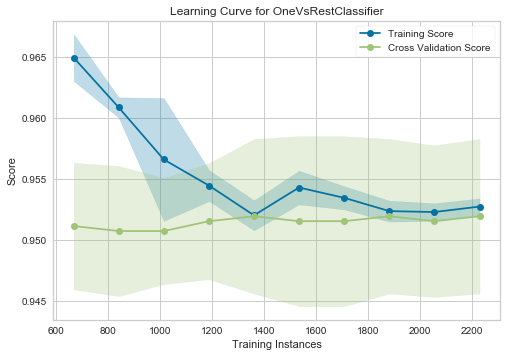

In [25]:
plot_model(rr, plot = 'learning')

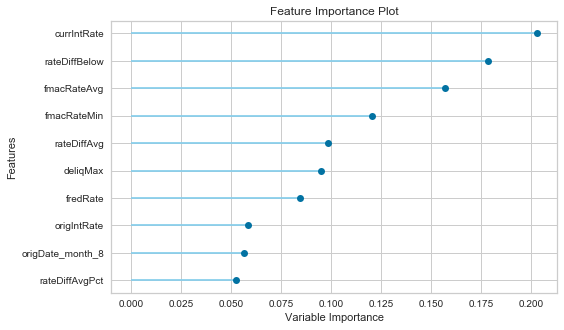

In [26]:
plot_model(rr, plot = 'feature')

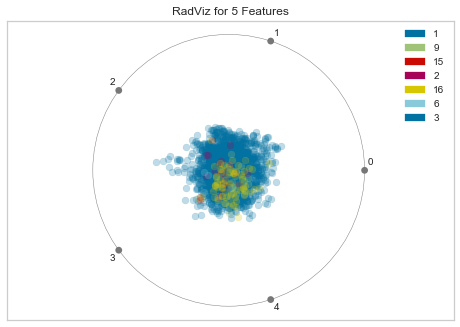

In [28]:
plot_model(rr, plot = 'dimension')

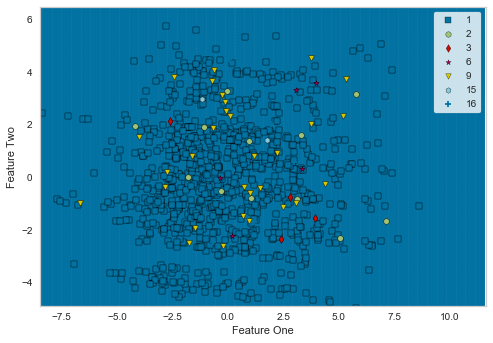

In [32]:
plot_model(rr, plot = 'boundary')

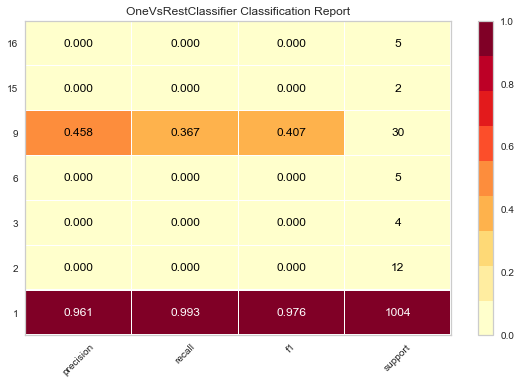

In [33]:
plot_model(rr, plot = 'class_report')

In [34]:
evaluate_model(rr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…